# Churn Model

In [2]:
from random import random as rand
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

def noise(label,acc=0.3):
    assert label in (0,1)
    correct = rand()<=acc
    if correct:
        if label:
            return 1
        elif not label:
            return 0
    if not correct:
        if label:
            return 0
        if not label:
            return 1
        
def classify(i,j):
    if i==j:
        if i==1:
            return "TP"
        else:
            return "TN"
    else:
        if i==1:
            return "FP"
        else:
            return "FN"

def intervene(t,printout=False):
    y_pred = [1 if i >= t else 0 for i in y_prob]
    res = [classify(i,j) for i,j in zip(y,y_pred)]
    TP = res.count('TP')
    TN = res.count('TN')
    FP = res.count('FP')
    FN = res.count('FN')
    saved = TP *customer_value
    lost = -FP * customer_value
    cost = -(TP+FN) * intervention_cost
    profit = saved + lost + cost

    if printout:
        for i in ('TP','TN','FP','FN'):
            print(i+'\t'+str(eval(i)))
        print()
        print(f'{saved:>10}  (saved)')
        print(f'{lost:>10}  (lost)')
        print(f'{cost:>10}  (cost)')
        print('-'*10) 
        print(f'{profit:>10}')        
    return profit

## Simulate Data

In [35]:
number_of_customers = 1000000
churn_rate = 0.2
num_features = 500

y = [0]*int(number_of_customers*(1-churn_rate)) + [1]*int(number_of_customers*(churn_rate))
X = [[noise(i,0.52) for i in y] for i in range(num_features)]
X = np.array(X).T

## Fit Data

In [36]:
model = LogisticRegression()
model.fit(X,y)
y_prob = model.predict_proba(X)[:,1]
print('accuracy:',model.score(X,y))

accuracy: 0.87148


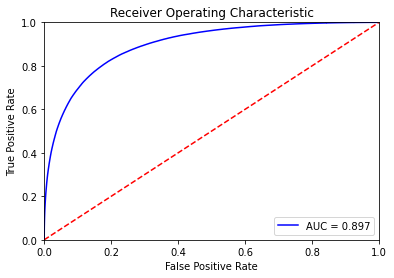

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y, y_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Distribution of probabilities

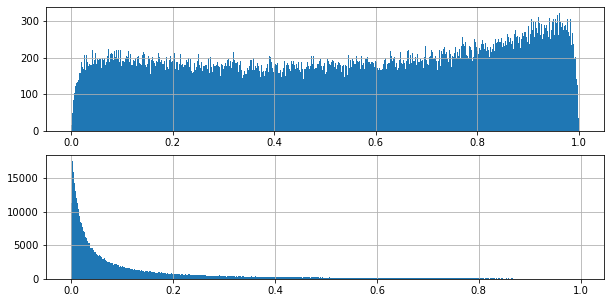

In [38]:
df = pd.DataFrame({'y':y,'y_prob':y_prob})


fig,ax = plt.subplots(2,1,figsize = (10,5))

df[df.y==1].y_prob.hist(ax = ax[0], bins = 1000)
df[df.y!=1].y_prob.hist(ax = ax[1], bins = 1000);

## Intervene

In [44]:
customer_value = 4000
intervention_cost = 1000

intervene(0.1,True)

TP	182127
TN	535875
FP	17873
FN	264125

 728508000  (saved)
 -71492000  (lost)
-446252000  (cost)
----------
 210764000


210764000

Customer value = 4000
Intervention cost = 1000

Max profit of 215466000 at 0.12244897959183673


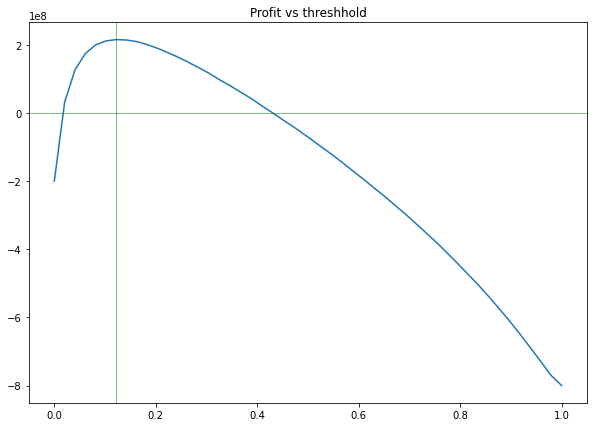

In [42]:
customer_value = 4000
intervention_cost = 1000

theta = np.linspace(0,1,50)
profit = [intervene(t) for t in theta]
max_profit = max(profit)
optimum = theta[len(profit)-1-profit[::-1].index(max(profit))]


print(f'Customer value = {customer_value}')
print(f'Intervention cost = {intervention_cost}\n')
print(f'Max profit of {max_profit} at {optimum}')

fig,ax = plt.subplots(figsize=(10,7))
ax.plot(theta,profit)
ax.axvline(optimum,color = 'green',lw=0.5)
ax.axhline(0,color = 'green',lw=0.5)
ax.set_title('Profit vs threshhold')
plt.plot();
